<a href="https://colab.research.google.com/github/shreyanknp/DA1/blob/main/Exercise_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
T-Statistic: -39.4927, P-Value: 0.0000
Reject the claim: The means are not equal.
Z-Statistic: 12.8223, P-Value: 0.0000
Reject the claim: The mean is not equal to 5.0.
F-Statistic: 960.0071, P-Value: 0.0000
Reject the claim: all means are not equal
Correlation Coefficient: 0.8718, P-Value: 0.000

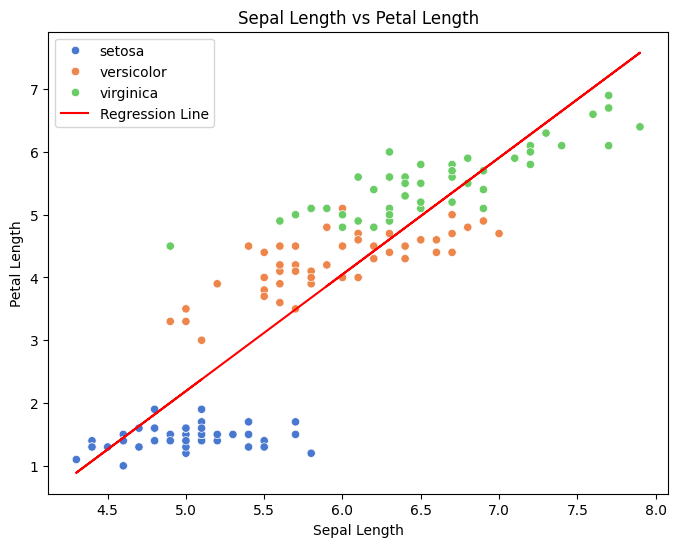

In [9]:
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

iris = sns.load_dataset('iris')
print(iris.head(10))

# independent t-test
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
#print(setosa_petal_length)
#print(versicolor_petal_length)

t_stat, p_value = stats.ttest_ind(setosa_petal_length, versicolor_petal_length)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject the claim: The means are not equal.")
else:
    print("Fail to reject the claim: The means are euqal.")

# Z-test
versicolor_sepal_length=iris[iris['species'] == 'versicolor']['sepal_length']
population_std=0.5  # assume standard deviation

z_stat, p_value_z = ztest(versicolor_sepal_length, value=5.0)

print(f"Z-Statistic: {z_stat:.4f}, P-Value: {p_value_z:.4f}")
if p_value_z < 0.05:
    print("Reject the claim: The mean is not equal to 5.0.")
else:
    print("Fail to reject the claim: The mean is equal to 5.0.")

# ANOVA
setosa_petal_width = iris[iris['species'] == 'setosa']['petal_width']
versicolor_petal_width = iris[iris['species'] == 'versicolor']['petal_width']
virginica_petal_width = iris[iris['species'] == 'virginica']['petal_width']

f_stat, p_value_anova = stats.f_oneway(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value_anova:.4f}")
if p_value_anova < 0.05:
    print("Reject the claim: all means are not equal")
else:
    print("Fail to reject the claim: all means are equal")

#correlation - sepal length vs petal length
sepal_length = iris['sepal_length']
petal_length = iris['petal_length']

correlation, p_value_corr = stats.pearsonr(sepal_length, petal_length)
print(f"Correlation Coefficient: {correlation:.4f}, P-Value: {p_value_corr:.4f}")

# linear regression
slope, intercept, r_value, p_value_reg, std_err = stats.linregress(sepal_length, petal_length)
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R-Squared: {r_value**2:.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=sepal_length, y=petal_length, hue=iris['species'], palette='muted')
plt.plot(sepal_length, slope * sepal_length + intercept, color='red', label='Regression Line')
plt.title('Sepal Length vs Petal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.show()
